In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten,Input, BatchNormalization
from keras import regularizers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 31)

In [6]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

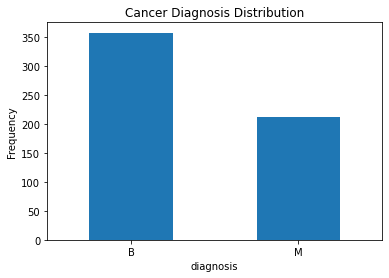

In [8]:
count_classes = pd.value_counts(dataset['diagnosis'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Cancer Diagnosis Distribution")
plt.xlabel("diagnosis")
plt.ylabel("Frequency")
plt.savefig(" Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)
#y = dataset.iloc[:,0].values

In [8]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
x.shape

(569, 30)

In [10]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [11]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [12]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

In [14]:
input_data = Input(shape=(30,))
encoded = Dense(3, activation='relu')(input_data)
decoded = Dense(30, activation='sigmoid')(encoded)

In [15]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                120       
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [16]:
x_test

array([[0.60581042, 0.65805658, 0.61222417, ..., 0.71293748, 1.        ,
        0.53274776],
       [0.41150909, 0.84870849, 0.40596436, ..., 0.52261109, 0.4717482 ,
        0.39278213],
       [0.15047489, 0.66482165, 0.1459699 , ..., 0.1482501 , 0.24497535,
        0.46992553],
       ...,
       [0.32273884, 0.59225092, 0.30865109, ..., 0.29221392, 0.1774744 ,
        0.19763223],
       [0.5462164 , 0.43050431, 0.55221125, ..., 0.71175777, 0.59385666,
        0.88543059],
       [0.68713142, 0.32349323, 0.70547503, ..., 0.82658278, 0.57830868,
        1.        ]])

In [17]:
history = autoencoder.fit(x_train, x_train, epochs=500, shuffle=True, validation_data=(x_val, x_val))

Train on 460 samples, validate on 57 samples
Epoch 1/500
460/460 [==============================] - 0s 226us/step - loss: 0.0990 - val_loss: 0.0846
Epoch 2/500
460/460 [==============================] - 0s 42us/step - loss: 0.0961 - val_loss: 0.0830
Epoch 3/500
460/460 [==============================] - 0s 48us/step - loss: 0.0934 - val_loss: 0.0818
Epoch 4/500
460/460 [==============================] - 0s 52us/step - loss: 0.0904 - val_loss: 0.0808
Epoch 5/500
460/460 [==============================] - 0s 37us/step - loss: 0.0872 - val_loss: 0.0800
Epoch 6/500
460/460 [==============================] - 0s 50us/step - loss: 0.0838 - val_loss: 0.0793
Epoch 7/500
460/460 [==============================] - 0s 46us/step - loss: 0.0803 - val_loss: 0.0789
Epoch 8/500
460/460 [==============================] - 0s 46us/step - loss: 0.0767 - val_loss: 0.0782
Epoch 9/500
460/460 [==============================] - 0s 50us/step - loss: 0.0732 - val_loss: 0.0778
Epoch 10/500
460/460 [==============

460/460 [==============================] - 0s 46us/step - loss: 0.0107 - val_loss: 0.0330
Epoch 160/500
460/460 [==============================] - 0s 48us/step - loss: 0.0107 - val_loss: 0.0329
Epoch 161/500
460/460 [==============================] - 0s 41us/step - loss: 0.0107 - val_loss: 0.0329
Epoch 162/500
460/460 [==============================] - 0s 41us/step - loss: 0.0107 - val_loss: 0.0329
Epoch 163/500
460/460 [==============================] - 0s 43us/step - loss: 0.0107 - val_loss: 0.0328
Epoch 164/500
460/460 [==============================] - 0s 41us/step - loss: 0.0107 - val_loss: 0.0326
Epoch 165/500
460/460 [==============================] - 0s 41us/step - loss: 0.0106 - val_loss: 0.0328
Epoch 166/500
460/460 [==============================] - 0s 41us/step - loss: 0.0106 - val_loss: 0.0326
Epoch 167/500
460/460 [==============================] - 0s 39us/step - loss: 0.0106 - val_loss: 0.0327
Epoch 168/500
460/460 [==============================] - 0s 41us/step - loss: 

Epoch 238/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0293
Epoch 239/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0293
Epoch 240/500
460/460 [==============================] - 0s 46us/step - loss: 0.0099 - val_loss: 0.0292
Epoch 241/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0292
Epoch 242/500
460/460 [==============================] - 0s 39us/step - loss: 0.0099 - val_loss: 0.0291
Epoch 243/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0290
Epoch 244/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0291
Epoch 245/500
460/460 [==============================] - 0s 41us/step - loss: 0.0099 - val_loss: 0.0290
Epoch 246/500
460/460 [==============================] - 0s 43us/step - loss: 0.0099 - val_loss: 0.0290
Epoch 247/500
460/460 [==============================] - 0s 52us

Epoch 395/500
460/460 [==============================] - 0s 46us/step - loss: 0.0086 - val_loss: 0.0258
Epoch 396/500
460/460 [==============================] - 0s 43us/step - loss: 0.0086 - val_loss: 0.0257
Epoch 397/500
460/460 [==============================] - 0s 41us/step - loss: 0.0086 - val_loss: 0.0257
Epoch 398/500
460/460 [==============================] - 0s 41us/step - loss: 0.0085 - val_loss: 0.0257
Epoch 399/500
460/460 [==============================] - 0s 41us/step - loss: 0.0085 - val_loss: 0.0257
Epoch 400/500
460/460 [==============================] - 0s 39us/step - loss: 0.0085 - val_loss: 0.0257
Epoch 401/500
460/460 [==============================] - 0s 48us/step - loss: 0.0085 - val_loss: 0.0256
Epoch 402/500
460/460 [==============================] - 0s 41us/step - loss: 0.0085 - val_loss: 0.0256
Epoch 403/500
460/460 [==============================] - 0s 41us/step - loss: 0.0085 - val_loss: 0.0257
Epoch 404/500
460/460 [==============================] - 0s 39us

Epoch 474/500
460/460 [==============================] - 0s 48us/step - loss: 0.0077 - val_loss: 0.0243
Epoch 475/500
460/460 [==============================] - 0s 52us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 476/500
460/460 [==============================] - 0s 52us/step - loss: 0.0077 - val_loss: 0.0243
Epoch 477/500
460/460 [==============================] - 0s 50us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 478/500
460/460 [==============================] - 0s 56us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 479/500
460/460 [==============================] - 0s 46us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 480/500
460/460 [==============================] - 0s 46us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 481/500
460/460 [==============================] - 0s 48us/step - loss: 0.0077 - val_loss: 0.0241
Epoch 482/500
460/460 [==============================] - 0s 50us/step - loss: 0.0077 - val_loss: 0.0242
Epoch 483/500
460/460 [==============================] - 0s 48us

In [18]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

52/52 [==============================] - 0s 77us/step
Loss: 0.028996222437574312


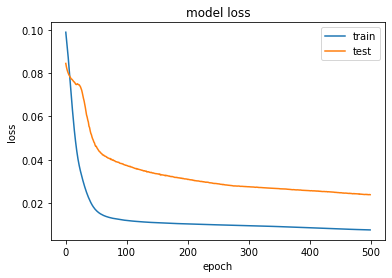

In [19]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('simpleAE_model_loss.png')
plt.show()

In [20]:
data = autoencoder.predict(x_test)

In [21]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [22]:
latent_vector.shape

(52, 3)

In [23]:
latent_vector

array([[3.4908335 , 1.4957213 , 0.        ],
       [3.3397782 , 3.3919156 , 0.        ],
       [0.5686181 , 1.5160575 , 0.        ],
       [2.4574504 , 1.8530734 , 0.        ],
       [1.8719261 , 3.172646  , 0.        ],
       [3.196032  , 3.4019866 , 0.        ],
       [0.31897944, 1.8111827 , 0.        ],
       [1.0946972 , 1.4542534 , 0.        ],
       [1.0886712 , 1.792953  , 0.        ],
       [1.8358824 , 2.3868861 , 0.        ],
       [1.6077421 , 2.259461  , 0.        ],
       [2.1736133 , 2.9331074 , 0.        ],
       [1.4015477 , 2.6496592 , 0.        ],
       [0.9172092 , 1.4717393 , 0.        ],
       [1.9670427 , 0.543038  , 0.        ],
       [1.1984293 , 1.4138486 , 0.        ],
       [0.        , 1.4369645 , 0.        ],
       [4.7237906 , 1.7614222 , 0.        ],
       [0.32843024, 1.7531945 , 0.        ],
       [2.4892395 , 3.6859546 , 0.        ],
       [4.6206584 , 1.663402  , 0.        ],
       [1.6121426 , 0.77061486, 0.        ],
       [2.

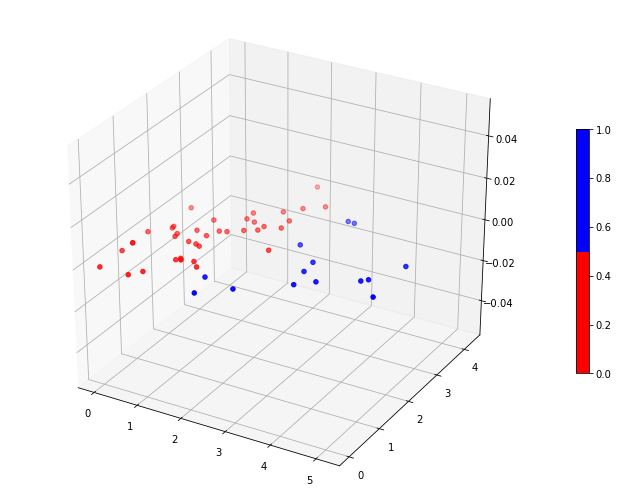

In [24]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('simpleAE_3d.png')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7115384615384616 and k :  [7 8]


In [26]:
y_pred=knn.predict(latent_vector)

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.28846153846153844
Mean Squared Error: 0.28846153846153844
Root Mean Squared Error: 0.5370861555295746
[[23 15]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.75        38
           1       0.48      1.00      0.65        14

    accuracy                           0.71        52
   macro avg       0.74      0.80      0.70        52
weighted avg       0.86      0.71      0.73        52

